In [1]:
import json
import math
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

import pandas as pd

#[CODE 1]
def correlation(x, y):
    n = len(x)
    vals = range(n)

    x_sum = 0.0
    y_sum = 0.0
    x_sum_pow = 0.0
    y_sum_pow = 0.0
    mul_xy_sum = 0.0
    
    for i in vals:
        mul_xy_sum = mul_xy_sum + float(x[i]) * float(y[i])
        x_sum = x_sum + float(x[i])
        y_sum = y_sum + float(y[i])
        x_sum_pow = x_sum_pow + pow(float(x[i]), 2)
        y_sum_pow = y_sum_pow + pow(float(y[i]), 2)
    
    try:
        r = ((n * mul_xy_sum) - (x_sum * y_sum)) / math.sqrt( ((n*x_sum_pow) - pow(x_sum, 2)) * ((n*y_sum_pow) - pow(y_sum, 2)) )
    except:
        r = 0.0
    
    return r

#[CODE 2]    
def setScatterGraph(tour_table, fv_table, tourpoint): #외국인방문객수,미국/일본/중국,관광지명
    
    #[CODE 8]
    tour = tour_table[tour_table['resNm'] == tourpoint]
    merge_table = pd.merge(tour, fv_table, left_index=True, right_index=True)

    fig = plt.figure()
    
    fig.suptitle(tourpoint + '상관관계 분석')
    
    plt.subplot(1, 3, 1)
    plt.xlabel('중국인 입국수')
    plt.ylabel('외국인 입장객수')
    r1 = correlation(list(merge_table['china']), list(merge_table['ForNum']))
    plt.title('r = {:.5f}'.format(r1))
    plt.scatter(list(merge_table['china']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    plt.subplot(1, 3, 2)
    plt.xlabel('일본인 입국수')
    plt.ylabel('외국인 입장객수')
    r2 = correlation(list(merge_table['japan']), list(merge_table['ForNum']))
    plt.title('r = {:.5f}'.format(r2))
    plt.scatter(list(merge_table['japan']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    plt.subplot(1, 3, 3)
    plt.xlabel('미국인 입국수')
    plt.ylabel('외국인 입장객수')
    r3 = correlation(list(merge_table['usa']), list(merge_table['ForNum']))
    plt.title('r = {:.5f}'.format(r3))
    plt.scatter(list(merge_table['usa']), list(merge_table['ForNum']), edgecolor='none', alpha=0.75, s=6, c='black')

    plt.tight_layout()

    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(10, 7)
    fig.savefig(tourpoint+'.png', dpi=300)
 
    plt.show()
    return [tourpoint, r1, r2, r3]
        
def main():

    font_location = "c:/Windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)

    #[CODE 4]
    tpFileName = '서울특별시_관광지입장정보_2011_2016.json'
    jsonTP = json.loads(open(tpFileName, 'r', encoding='utf-8').read())
    tour_table = pd.DataFrame(jsonTP, columns=('yyyymm', 'resNm', 'ForNum'))
    tour_table = tour_table.set_index('yyyymm')
    
    #[CODE 5]
    resNm = tour_table.resNm.unique()
    
    #[CODE 6]
    fv_CFileName = '중국(112)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_CFileName, 'r', encoding='utf-8').read())
    china_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    china_table = china_table.rename(columns={'visit_cnt': 'china'})
    china_table = china_table.set_index('yyyymm')

    fv_JFileName = '일본(130)_해외방문객정보_2011_2016.json'
    jsonFV = json.loads(open(fv_JFileName, 'r', encoding='utf-8').read())
    japan_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    japan_table = japan_table.rename(columns={'visit_cnt': 'japan'})
    japan_table = japan_table.set_index('yyyymm')

    fv_UFileName = '미국(275)_해외방문객정보_2011_2016.json' 
    jsonFV = json.loads(open(fv_UFileName, 'r', encoding='utf-8').read())
    usa_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
    usa_table = usa_table.rename(columns={"visit_cnt": "usa"})
    usa_table = usa_table.set_index('yyyymm')

    #[CODE 7]
    fv_table = pd.merge(china_table, japan_table, left_index=True, right_index=True)
    fv_table = pd.merge(fv_table, usa_table, left_index=True, right_index=True)

    r_list = []
    for tourpoint in resNm:
        #[CODE 9]
        r_list.append(setScatterGraph(tour_table, fv_table, tourpoint))
    
    print(r_list)
    
    #[CODE 10]
    r_table = pd.DataFrame(r_list, columns=('tourpoint', 'china', 'japan', 'usa'))
    r_table = r_table.set_index('tourpoint')
    r_table = r_table.drop('서울시립미술관 본관')
    r_table = r_table.drop('서대문자연사박물관')
    r_table.plot(kind='bar', rot=70)
    plt.show()
           
if __name__ == "__main__":
    main()

[['창덕궁', 0.11517680297805839, 0.4351597161641054, 0.4991198858893025], ['운현궁', 0.5671133595743602, 0.34564059371924516, 0.44393960758693146], ['경복궁', 0.8494433232820975, -0.17004597321064757, 0.6630492838034528], ['창경궁', 0.4455478210842133, 0.040131569154568066, 0.697825001316531], ['종묘', -0.5565749721325933, 0.9123262864909116, -0.13297480141528586], ['국립중앙박물관', 0.5720400896052417, -0.15015696956339286, 0.48041196777581124], ['서울역사박물관', 0.5165375855740799, 0.1451764252531756, 0.40333736944898], ['덕수궁', 0.7149864120921465, -0.061116272552536946, 0.7199687351933926], ['서울시립미술관 본관', 0.0, 0.0, 0.0], ['태릉 ·  강릉 · 조선왕릉전시관', 0.019933863484337105, 0.2262912004195081, 0.07198595831590915], ['서대문형무소역사관', 0.5312183347973358, -0.22604543918467984, 0.2697852420164024], ['서대문자연사박물관', 0.0, 0.0, 0.0], ['트릭아이미술관', 0.5601592464577234, -0.4787520434870875, 0.27386787309379307], ['헌릉ㆍ인릉', -0.6313733265926633, 0.8472044243867891, -0.2573388025480664], ['선릉·정릉', -0.6446670996941203, 0.8343800369408283, -0.

In [2]:
tpFileName = '서울특별시_관광지입장정보_2011_2016.json'
jsonTP = json.loads(open(tpFileName, 'r', encoding='utf-8').read())
tour_table = pd.DataFrame(jsonTP)
tour_table.head()

,ForNum,NatNum,addrCd,gungu,resNm,rnum,sido,yyyymm
0,14137,43677,1111,종로구,창덕궁,1,서울특별시,201101
1,0,6523,1111,종로구,운현궁,2,서울특별시,201101
2,40224,141183,1111,종로구,경복궁,3,서울특별시,201101
3,697,17644,1111,종로구,창경궁,4,서울특별시,201101
4,6837,11486,1111,종로구,종묘,5,서울특별시,201101


In [3]:
tour_table = tour_table.set_index('yyyymm')

In [4]:
tour_table.head()

,ForNum,NatNum,addrCd,gungu,resNm,rnum,sido
yyyymm,,,,,,,
201101,14137,43677,1111,종로구,창덕궁,1,서울특별시
201101,0,6523,1111,종로구,운현궁,2,서울특별시
201101,40224,141183,1111,종로구,경복궁,3,서울특별시
201101,697,17644,1111,종로구,창경궁,4,서울특별시
201101,6837,11486,1111,종로구,종묘,5,서울특별시


In [5]:
#[CODE 5]
resNm = tour_table.resNm.unique()
resNm

array(['창덕궁', '운현궁', '경복궁', '창경궁', '종묘', '국립중앙박물관', '서울역사박물관', '덕수궁',
       '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '서대문자연사박물관',
       '트릭아이미술관', '헌릉ㆍ인릉', '선릉·정릉', '롯데월드'], dtype=object)

In [6]:
fv_CFileName = '중국(112)_해외방문객정보_2011_2016.json'
jsonFV = json.loads(open(fv_CFileName, 'r', encoding='utf-8').read())
china_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
china_table = china_table.rename(columns={'visit_cnt': 'china'})
china_table = china_table.set_index('yyyymm')
china_table.head()

,china
yyyymm,
201101,113927
201102,157019
201103,163261
201104,153875
201105,152347


In [7]:
fv_JFileName = '일본(130)_해외방문객정보_2011_2016.json'
jsonFV = json.loads(open(fv_JFileName, 'r', encoding='utf-8').read())
japan_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
japan_table = japan_table.rename(columns={'visit_cnt': 'japan'})
japan_table = japan_table.set_index('yyyymm')
japan_table.head()

,japan
yyyymm,
201101,196301
201102,221318
201103,268355
201104,220142
201105,234626


In [8]:
fv_UFileName = '미국(275)_해외방문객정보_2011_2016.json' 
jsonFV = json.loads(open(fv_UFileName, 'r', encoding='utf-8').read())
usa_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
usa_table = usa_table.rename(columns={"visit_cnt": "usa"})
usa_table = usa_table.set_index('yyyymm')
usa_table.head()

,usa
yyyymm,
201101,44152
201102,43500
201103,54135
201104,58220
201105,61077


In [9]:
#[CODE 7]
fv_table = pd.merge(china_table, japan_table, left_index=True, right_index=True)
fv_table = pd.merge(fv_table, usa_table, left_index=True, right_index=True)
fv_table.head()

,china,japan,usa
yyyymm,,,
201101,113927,196301,44152
201102,157019,221318,43500
201103,163261,268355,54135
201104,153875,220142,58220
201105,152347,234626,61077


In [10]:
resNm = tour_table.resNm.unique()
resNm

array(['창덕궁', '운현궁', '경복궁', '창경궁', '종묘', '국립중앙박물관', '서울역사박물관', '덕수궁',
       '서울시립미술관 본관', '태릉 ·  강릉 · 조선왕릉전시관', '서대문형무소역사관', '서대문자연사박물관',
       '트릭아이미술관', '헌릉ㆍ인릉', '선릉·정릉', '롯데월드'], dtype=object)

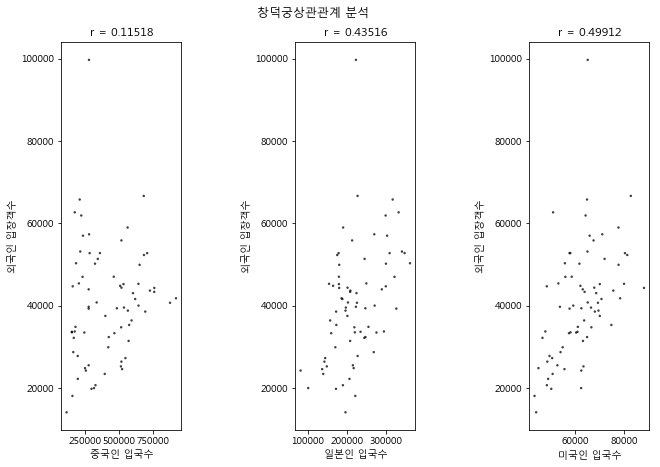

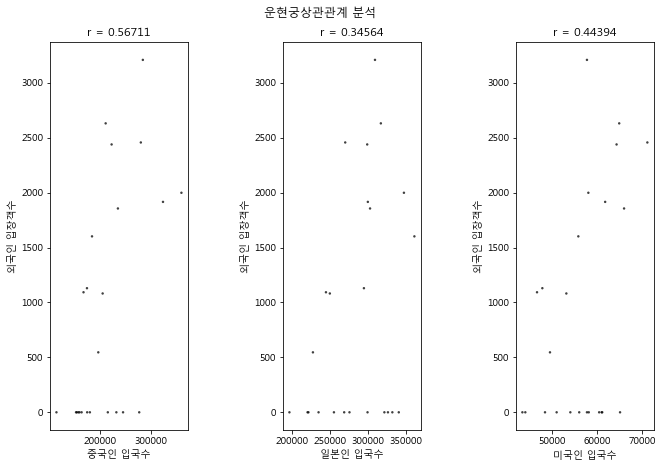

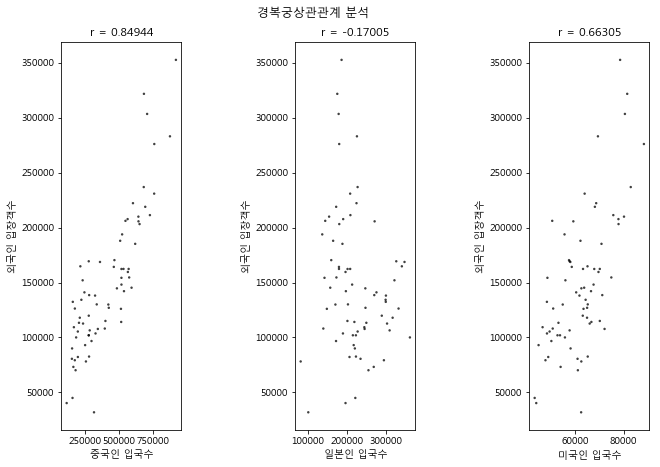

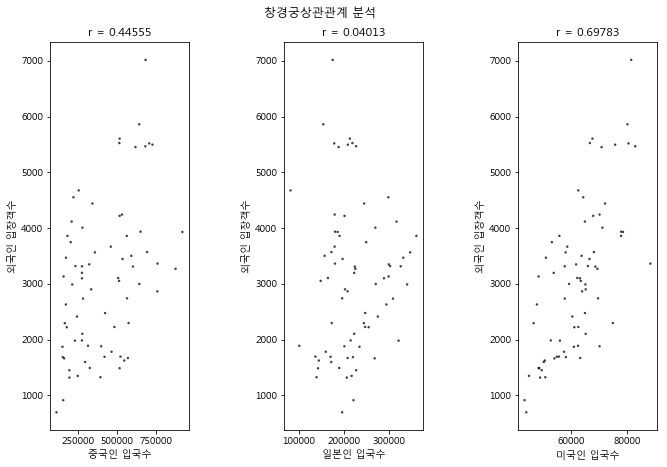

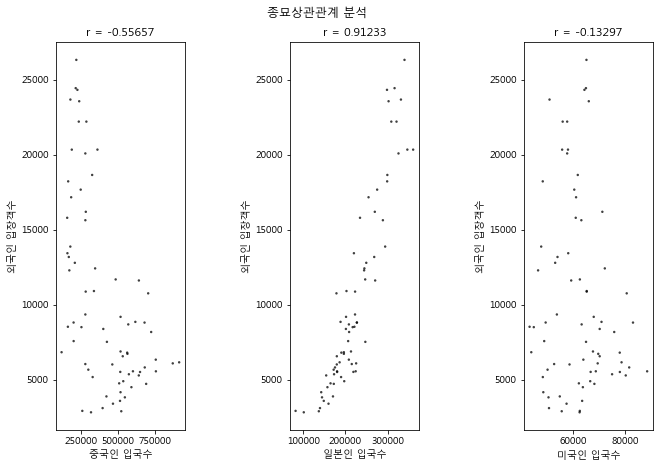

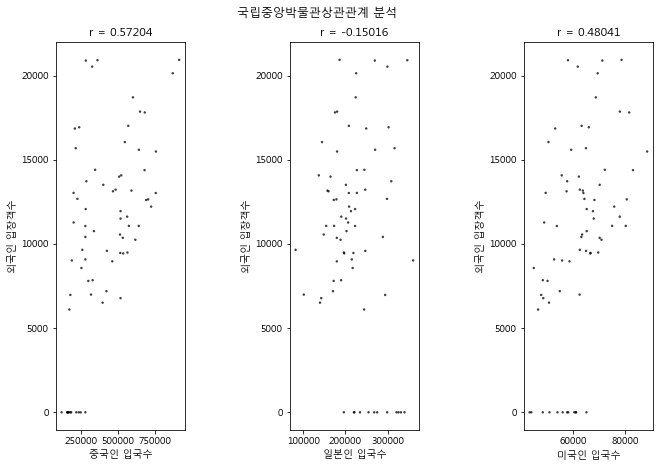

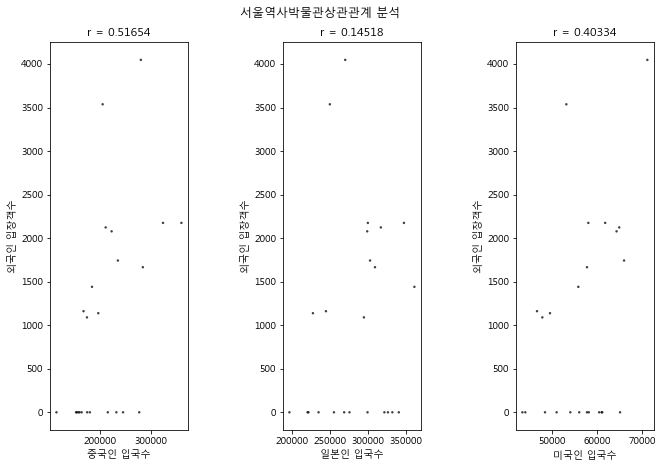

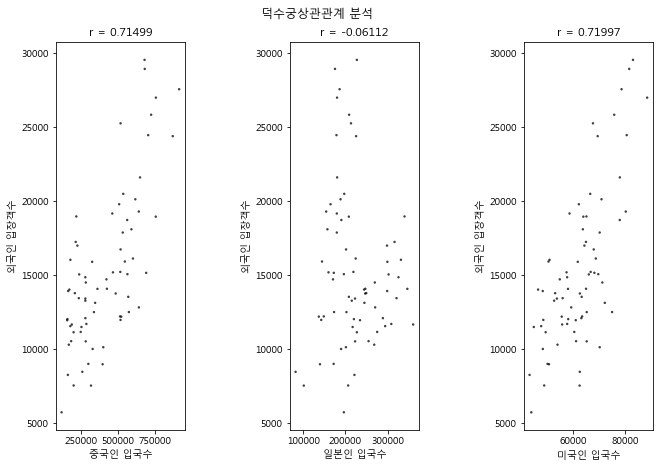

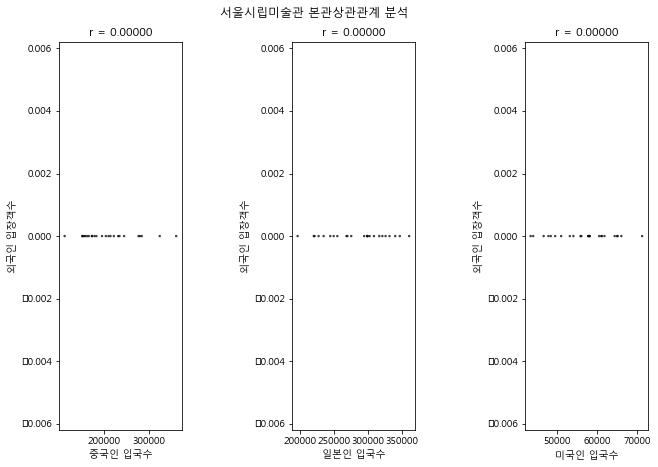

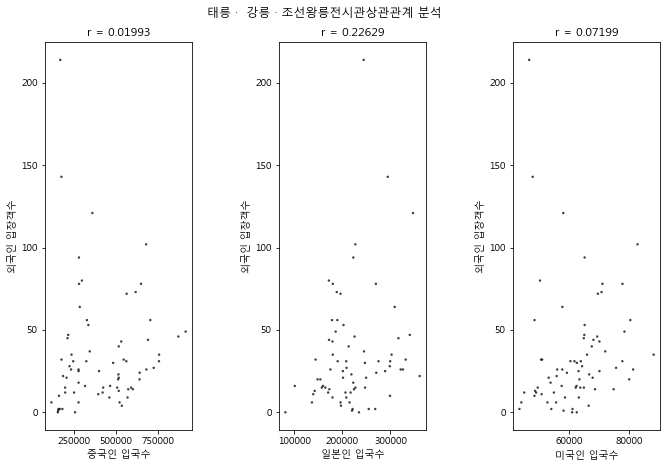

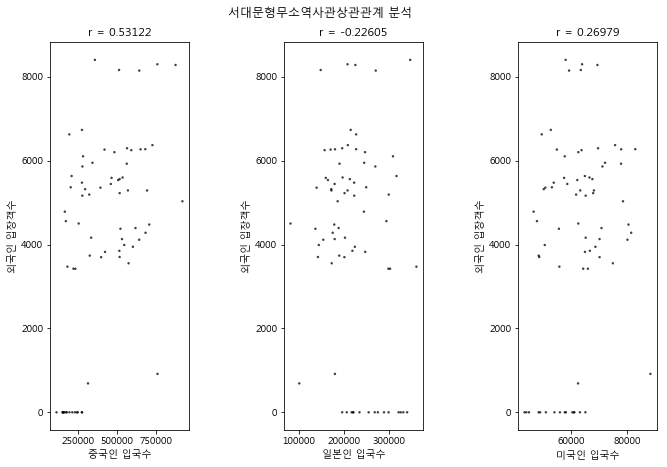

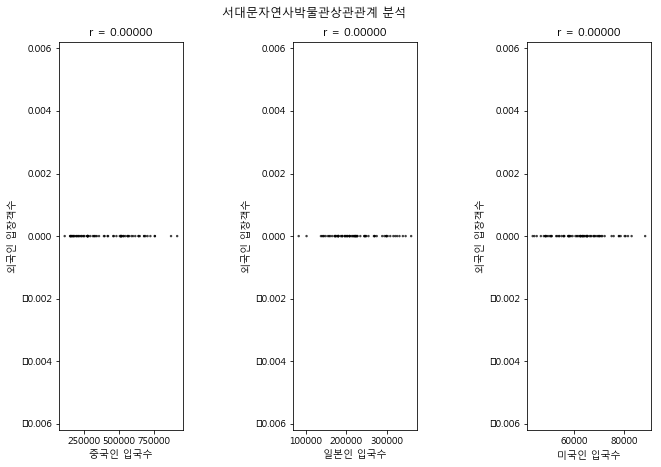

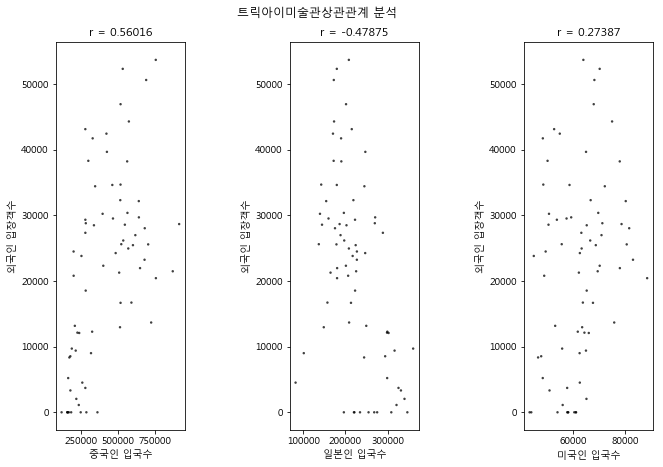

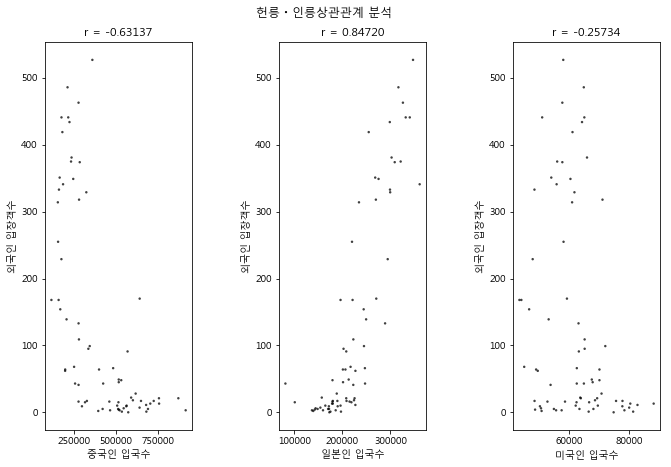

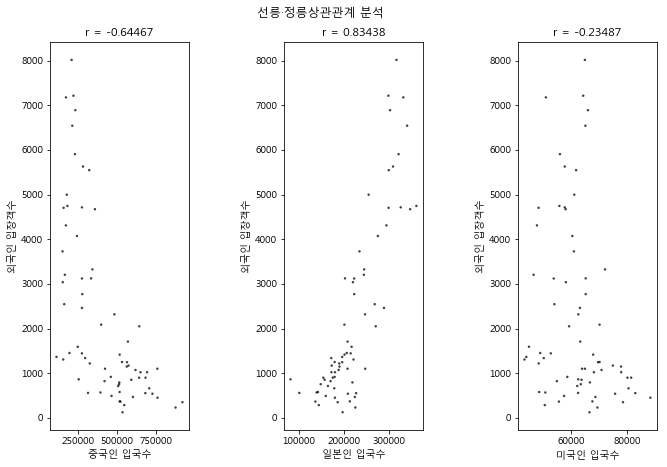

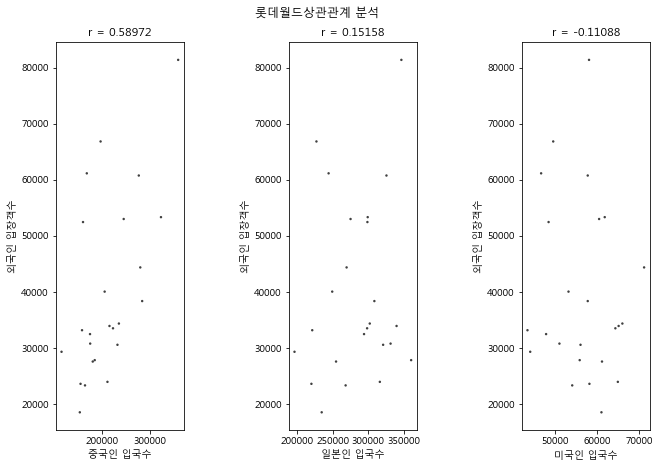

In [11]:
r_list = []
for tourpoint in resNm:
       #[CODE 9]
    r_list.append(setScatterGraph(tour_table, fv_table, tourpoint))

In [12]:
r_list

[['창덕궁', 0.11517680297805839, 0.4351597161641054, 0.4991198858893025],
 ['운현궁', 0.5671133595743602, 0.34564059371924516, 0.44393960758693146],
 ['경복궁', 0.8494433232820975, -0.17004597321064757, 0.6630492838034528],
 ['창경궁', 0.4455478210842133, 0.040131569154568066, 0.697825001316531],
 ['종묘', -0.5565749721325933, 0.9123262864909116, -0.13297480141528586],
 ['국립중앙박물관', 0.5720400896052417, -0.15015696956339286, 0.48041196777581124],
 ['서울역사박물관', 0.5165375855740799, 0.1451764252531756, 0.40333736944898],
 ['덕수궁', 0.7149864120921465, -0.061116272552536946, 0.7199687351933926],
 ['서울시립미술관 본관', 0.0, 0.0, 0.0],
 ['태릉 ·  강릉 · 조선왕릉전시관',
  0.019933863484337105,
  0.2262912004195081,
  0.07198595831590915],
 ['서대문형무소역사관', 0.5312183347973358, -0.22604543918467984, 0.2697852420164024],
 ['서대문자연사박물관', 0.0, 0.0, 0.0],
 ['트릭아이미술관', 0.5601592464577234, -0.4787520434870875, 0.27386787309379307],
 ['헌릉ㆍ인릉', -0.6313733265926633, 0.8472044243867891, -0.2573388025480664],
 ['선릉·정릉', -0.6446670996941203, 0.8

In [13]:
#[CODE 8]
tour = tour_table[tour_table['resNm'] == tourpoint]
merge_table = pd.merge(tour, fv_table, left_index=True, right_index=True)
merge_table.head()

,ForNum,NatNum,addrCd,gungu,resNm,rnum,sido,china,japan,usa
yyyymm,,,,,,,,,,
201101,29335,494730,1171,송파구,롯데월드,16,서울특별시,113927,196301,44152
201102,33180,506321,1171,송파구,롯데월드,16,서울특별시,157019,221318,43500
201103,23335,288170,1171,송파구,롯데월드,16,서울특별시,163261,268355,54135
201104,23615,446939,1171,송파구,롯데월드,16,서울특별시,153875,220142,58220
201105,18532,474422,1171,송파구,롯데월드,16,서울특별시,152347,234626,61077


In [23]:
china_table

,china
yyyymm,
201101,113927
201102,157019
201103,163261
201104,153875
201105,152347
201106,179508
201107,244573
201108,276299
201109,231462


In [22]:
tour_table2= tour_table

tour_table2=tour_table2.drop('서울시립미술관 본관')

#r_table = r_table.drop('서울시립미술관 본관')
#r_table = r_table.drop('서대문자연사박물관')

957

In [26]:
china_table.index

Index(['201101', '201102', '201103', '201104', '201105', '201106', '201107',
       '201108', '201109', '201110', '201111', '201112', '201201', '201202',
       '201203', '201204', '201205', '201206', '201207', '201208', '201209',
       '201210', '201211', '201212', '201301', '201302', '201303', '201304',
       '201305', '201306', '201307', '201308', '201309', '201310', '201311',
       '201312', '201401', '201402', '201403', '201404', '201405', '201406',
       '201407', '201408', '201409', '201410', '201411', '201412', '201501',
       '201502', '201503', '201504', '201505', '201506', '201507', '201508',
       '201509', '201510', '201511', '201512', '201601', '201602', '201603',
       '201604', '201605', '201606', '201607', '201608', '201609', '201610',
       '201611', '201612'],
      dtype='object', name='yyyymm')

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fv_CFileName = '중국(112)_해외방문객정보_2011_2016.json'
jsonFV = json.loads(open(fv_CFileName, 'r', encoding='utf-8').read())
china_table = pd.DataFrame(jsonFV, columns=('yyyymm', 'visit_cnt'))
china_table = china_table.set_index('yyyymm')

china_table.index=pd.to_datetime(china_table.index, format="%Y%m")
china_table['year']=china_table.index.year
china_table['month']=china_table.index.month

china_table.head()

,visit_cnt,year,month
yyyymm,,,
2011-01-01,113927,2011,1
2011-02-01,157019,2011,2
2011-03-01,163261,2011,3
2011-04-01,153875,2011,4
2011-05-01,152347,2011,5


In [28]:
china_table = china_table.set_index(['month','year'])['visit_cnt'].unstack(fill_value=0)
print(china_table)

year     2011    2012    2013    2014    2015    2016
month                                                
1      113927  167022  196371  296708  394345  521981
2      157019  173790  249698  326295  516787  546408
3      163261  183691  276479  423768  515130  601671
4      153875  222114  335069  531947  641610  682318
5      152347  210439  278723  517031  618083  705844
6      179508  234482  399031  573852  315095  758534
7      244573  322917  569787  692053  255632  917519
8      276299  359065  642258  757683  513275  873771
9      231462  283402  483518  564078  591242  726266
10     214681  279440  343273  562278  650174  680918
11     174164  204533  276428  460671  507579  516956
12     159080  195997  276234  420501  465218  535536


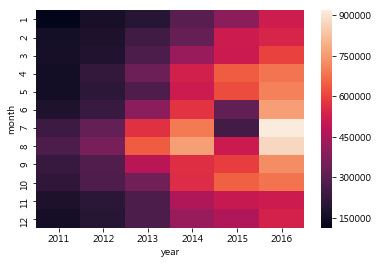

In [29]:
sns.heatmap(china_table)
plt.show()